In [1]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sparse
from sklearn.decomposition import PCA

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from nltk.corpus import stopwords
from sklearn.cross_validation import StratifiedKFold
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import recall_score

from tensorflow.examples.tutorials.mnist import input_data
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.objectives import binary_crossentropy
from keras.callbacks import LearningRateScheduler


# In[2]:

from scipy.stats import norm

import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
import tensorflow as tf
from keras import metrics

from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 

from keras.layers import Dense, Dropout, Activation, Flatten
def column(matrix, i):
    return [row[i] for row in matrix]

/home/andrew/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
import pandas as pd
df_train = pd.read_json("train.json/train.json")
df_train = pd.DataFrame(df_train)
numpydf_train = df_train.values
df_test = pd.read_json("test.json/test.json")
df_test = pd.DataFrame(df_test)
numpydf_test = df_test.values

In [3]:
print df_train
print df_test

                                                 band_1  \
0     [-27.878361, -27.15416, -28.668615, -29.537971...   
1     [-12.242375, -14.920305, -14.920363, -12.66633...   
2     [-24.603676, -24.603714, -24.871029, -23.15277...   
3     [-22.454607, -23.082819, -23.998013, -23.99805...   
4     [-26.006956, -23.164886, -23.164886, -26.89116...   
5     [-20.769371, -20.769434, -25.906025, -25.90602...   
6     [-26.673811, -23.666162, -27.622442, -28.31768...   
7     [-24.989119, -27.755224, -25.817074, -24.98927...   
8     [-17.146641, -17.146572, -17.994583, -19.44553...   
9     [-24.020853, -23.551275, -27.18819, -29.126434...   
10    [-21.397552, -19.753859, -23.426783, -24.65221...   
11    [-22.020813, -22.020864, -20.345379, -18.07829...   
12    [-21.112206, -21.638832, -25.436468, -23.22255...   
13    [-23.864258, -27.755791, -26.047226, -24.62014...   
14    [-20.558899, -21.328135, -19.585205, -19.71788...   
15    [-28.282215, -27.896156, -25.882795, -25.88279... 

In [4]:
band1_train = df_train['band_1'].values
band2_train = df_train['band_2'].values
inc_angle_train = df_train['inc_angle'].values
print band1_train.shape
print band2_train.shape
print inc_angle_train.shape

band1_test = df_test['band_1'].values
band2_test = df_test['band_2'].values
inc_angle_test = df_test['inc_angle'].values
print band1_test.shape
print band2_test.shape
print inc_angle_test.shape

(1604,)
(1604,)
(1604,)
(8424,)
(8424,)
(8424,)


In [122]:
y_train = df_train['is_iceberg'].values
print y_train

[0 0 1 ..., 0 0 0]


In [7]:
images_train=[]
for cnt,img in enumerate(band1_train):
    images_train.append([img,band2_train[cnt]])
npimages_train = np.array(images_train)
npimages_train=np.reshape(npimages_train,(1604,75,75,2))
print npimages_train.shape

images_test=[]
for cnt,img in enumerate(band1_test):
    images_test.append([img,band2_test[cnt]])
npimages_test = np.array(images_test)
npimages_test=np.reshape(npimages_test,(8424,75,75,2))
print npimages_test.shape

(1604, 75, 75, 2)
(8424, 75, 75, 2)


# Autoencoder Test

In [109]:
# In[3]:


# m : batch size
m = 50   
# n_z : latent dimension
n_z = 30
# n_epoch : number of epoches for iterations
n_epoch = 10

epsilon_std=1.0
# intermediate_dim = 512

# Q(z|X) -- encoder
inputs1 = Input(shape=(75,75,2))
conv1=(Conv2D(1, (12, 12), input_shape=(75,75,2),border_mode = 'same'))(inputs1)
act1 = Activation('relu')(conv1)
maxpool=(MaxPooling2D(pool_size=(15,15),padding='same'))(act1)
#conv2=(Conv2D(2, (3, 3),border_mode = 'same'))(maxpool)
#act2 = Activation('relu')(conv2)
#maxpool2=(MaxPooling2D(pool_size=(2,2),padding='same'))(act2)
#conv3=(Conv2D(4, (3, 3),border_mode = 'same'))(maxpool2)
#act3 = Activation('relu')(conv3)
#maxpool3=(MaxPooling2D(pool_size=(2,2),padding='same'))(act3)
#conv4=(Conv2D(2, (3, 3),border_mode = 'same'))(maxpool3)
#act4 = Activation('relu')(conv4)
#maxpool4=(MaxPooling2D(pool_size=(2,2),padding='same'))(act4)
flat = Flatten()(maxpool)

#h_q = Dense(32, activation='relu')(flat)
#encoded = Dense(25, activation='linear')(flat)


/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (12, 12), padding="same", input_shape=(75, 75, 2...)`
  app.launch_new_instance()


In [113]:
# In[9]:
from keras.layers.core import Activation, Reshape
from keras.layers import UpSampling2D


# P(X|z) -- decoder
#decoder_hidden = Dense(32, activation='relu')
#decoder_out = Dense(25, activation='relu')
reshape_Layer1 = Reshape((5,5,1))
upsamp1 = UpSampling2D(size=(15,15))
deconv1=(Conv2D(2, (12, 12),border_mode = 'same'))#(act3)
deact1 = Activation('relu')#(reshape_Layer)
#upsamp2 = UpSampling2D(size=(5,5))
#deconv2=(Conv2D(4, (3, 3),border_mode = 'same'))#(act1)
#deact2 = Activation('relu')#(conv3)
#upsamp3 = UpSampling2D(size=(1,1))
#deconv3=(Conv2D(16, (3, 3),border_mode = 'same'))#(act3)
#deact3 = Activation('relu')#(reshape_Layer)
#upsamp4 = UpSampling2D(size=(1,1))
#deconv4=(Conv2D(2, (3, 3),border_mode = 'same'))#(act1)
#deact4 = Activation('relu')#(conv3)
#reshape_Layer2 = Reshape((75,75,2))#(decoder_out)


#h_p = decoder_hidden(encoded)
#d_out = decoder_out(encoded)
d_reshp = reshape_Layer1(flat)
d_up1 = upsamp1(d_reshp)
d_cnv1 = deconv1(d_up1)
outputs = deact1(d_cnv1)
#d_act1 = deact1(d_cnv1)
#d_up2 = upsamp2(d_act1)
#d_cnv2 = deconv2(d_up2)
#d_act2 = deact2(d_cnv2)
#d_up3 = upsamp3(d_act2)
#d_cnv3 = deconv3(d_up3)
#d_act3 = deact3(d_cnv3)
#d_up4 = upsamp4(d_act3)
#d_cnv4 = deconv4(d_up4)
#outputs = deact4(d_cnv4)

/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2, (12, 12), padding="same")`
  # This is added back by InteractiveShellApp.init_path()


In [114]:

# Overall VAE model, for reconstruction and training
vae = Model(inputs1, outputs)

# Encoder model, to encode input into latent variable
# We use the mean as the output as it is the center point, the representative of the gaussian
encoder = Model(inputs1, flat)

# Generator model, generate new data given latent variable z
#d_in = Input(shape=(n_z,))
#d_h = decoder_hidden(d_in)
#d_out = decoder_out(d_h)
#generator = Model(d_in, d_out)


In [115]:
print vae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_42 (InputLayer)        (None, 75, 75, 2)         0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 75, 75, 1)         289       
_________________________________________________________________
activation_90 (Activation)   (None, 75, 75, 1)         0         
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 5, 5, 1)           0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 25)                0         
_________________________________________________________________
reshape_34 (Reshape)         (None, 5, 5, 1)           0         
_________________________________________________________________
up_sampling2d_40 (UpSampling (None, 75, 75, 1)         0         
__________

In [116]:

vae.compile(optimizer='rmsprop', loss='mse')
vae.fit(npimages_train, npimages_train, batch_size=m, nb_epoch=n_epoch,
        validation_data=(npimages_test, npimages_test))


/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 1604 samples, validate on 8424 samples
Epoch 1/10
1604/1604 [==============================] - 41s - loss: 679.5437 - val_loss: 584.6348
Epoch 2/10
1604/1604 [==============================] - 41s - loss: 580.1098 - val_loss: 582.1903
Epoch 3/10
1604/1604 [==============================] - 43s - loss: 579.1967 - val_loss: 581.9550
Epoch 4/10
1604/1604 [==============================] - 45s - loss: 579.0520 - val_loss: 581.8702
Epoch 5/10
1604/1604 [==============================] - 44s - loss: 579.0136 - val_loss: 581.8622
Epoch 6/10
1604/1604 [==============================] - 45s - loss: 579.0105 - val_loss: 581.8622
Epoch 7/10
1604/1604 [==============================] - 43s - loss: 579.0105 - val_loss: 581.8622
Epoch 8/10
1604/1604 [==============================] - 44s - loss: 579.0105 - val_loss: 581.8622
Epoch 9/10
1604/1604 [==============================] - 41s - loss: 579.0105 - val_loss: 581.8622
Epoch 10/10
1604/1604 [==============================] - 41s - loss: 5

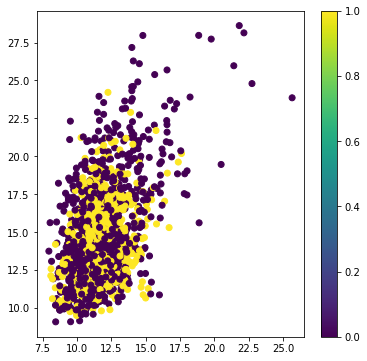

In [117]:
x_test_encoded = encoder.predict(npimages_train, batch_size=m)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_train)
plt.colorbar()
plt.show()

## Convolutional Supervised Approach

In [139]:
del ConvNet

In [140]:

inputs1 = Input(shape=(75,75,2))
conv1=(Conv2D(16, (5, 5), input_shape=(75,75,2),border_mode = 'same'))(inputs1)
act1 = Activation('relu')(conv1)
maxpool=(MaxPooling2D(pool_size=(2,2),padding='same'))(act1)
conv2=(Conv2D(8, (4, 4),border_mode = 'same'))(maxpool)
act2 = Activation('relu')(conv2)
maxpool2=(MaxPooling2D(pool_size=(2,2),padding='same'))(act2)
conv3=(Conv2D(4, (3, 3),border_mode = 'same'))(maxpool2)
act3 = Activation('relu')(conv3)
maxpool3=(MaxPooling2D(pool_size=(2,2),padding='same'))(act3)
conv4=(Conv2D(2, (2, 2),border_mode = 'same'))(maxpool3)
act4 = Activation('relu')(conv4)
maxpool4=(MaxPooling2D(pool_size=(2,2),padding='same'))(act4)
flat = Flatten()(maxpool4)
h_q = Dense(16, activation='tanh')(flat)
outputs = Dense(1, activation='sigmoid')(h_q)

ConvNet = Model(inputs1, outputs)
print ConvNet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_50 (InputLayer)        (None, 75, 75, 2)         0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 75, 75, 16)        816       
_________________________________________________________________
activation_121 (Activation)  (None, 75, 75, 16)        0         
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 38, 38, 16)        0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 38, 38, 8)         2056      
_________________________________________________________________
activation_122 (Activation)  (None, 38, 38, 8)         0         
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 19, 19, 8)         0         
__________

/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), padding="same", input_shape=(75, 75, 2...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (4, 4), padding="same")`
  
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (3, 3), padding="same")`
  if __name__ == '__main__':
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2, (2, 2), padding="same")`
  if sys.path[0] == '':


In [141]:

ConvNet.compile(optimizer='adam', loss='binary_crossentropy',
metrics=["accuracy"])
ConvNet.fit(npimages_train, y_train, batch_size=64, nb_epoch=50,
        validation_split=.1)

/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 1443 samples, validate on 161 samples
Epoch 1/50
1443/1443 [==============================] - 6s - loss: 0.6954 - acc: 0.5572 - val_loss: 0.6627 - val_acc: 0.6025
Epoch 2/50
1443/1443 [==============================] - 5s - loss: 0.6641 - acc: 0.6022 - val_loss: 0.6744 - val_acc: 0.5776
Epoch 3/50
1443/1443 [==============================] - 5s - loss: 0.6414 - acc: 0.6590 - val_loss: 0.6872 - val_acc: 0.5093
Epoch 4/50
1443/1443 [==============================] - 5s - loss: 0.5996 - acc: 0.6736 - val_loss: 0.6404 - val_acc: 0.4907
Epoch 5/50
1443/1443 [==============================] - 5s - loss: 0.5644 - acc: 0.7193 - val_loss: 0.6541 - val_acc: 0.4720
Epoch 6/50
1443/1443 [==============================] - 5s - loss: 0.5432 - acc: 0.7235 - val_loss: 0.6729 - val_acc: 0.4596
Epoch 7/50
1443/1443 [==============================] - 5s - loss: 0.5169 - acc: 0.7367 - val_loss: 0.6498 - val_acc: 0.5404
Epoch 8/50
1443/1443 [==============================] - 5s - loss: 0.5034 - ac